In [2]:
# Install missing dependencies
%pip install scikit-learn plotly seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle
import warnings
warnings.filterwarnings('ignore')

print("📊 Libraries imported successfully!")

  Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.7 MB 4.5 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 6.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.7 MB/s eta 0:00:00
Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl (38.5 MB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 

In [4]:
# Load the cleaned dataset
import os
os.chdir("C:/Users/Inchara/SHOPPER-SPECTRUM")  # ✅ Change this path if your project is elsewhere


df = pd.read_csv('data/processed/cleaned_ecommerce_data.csv')

# Convert date column back to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("=== CLEANED DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

# Quick preview
df.head()


=== CLEANED DATASET OVERVIEW ===
Shape: (392692, 16)
Memory usage: 128.92 MB
Date range: 2022-12-01 08:26:00 to 2023-12-09 12:50:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,DayOfWeek,DayName,Hour,DaysSinceLatest
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2022,12,1,3,Thursday,8,373
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022,12,1,3,Thursday,8,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2022,12,1,3,Thursday,8,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022,12,1,3,Thursday,8,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2022,12,1,3,Thursday,8,373


=== 1. DATASET OVERVIEW ===
• Total Transactions: 392692
• Unique Customers: 4338
• Unique Products: 3665
• Unique Countries: 37
• Total Revenue: $8,887,208.89
• Average Transaction Value: $22.63
• Date Range: 373 days

📈 Statistical Summary:
            Quantity      UnitPrice    TotalAmount
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914      22.631500
std       180.492832      22.241836     311.099224
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000

=== 2. GEOGRAPHIC ANALYSIS ===
Top 10 Countries by Revenue:
                Unique_Invoices  Unique_Customers  Total_Revenue  \
Country                                                            
United Kingdom            16646              3920     7285024.64   
Netherlands                  94  

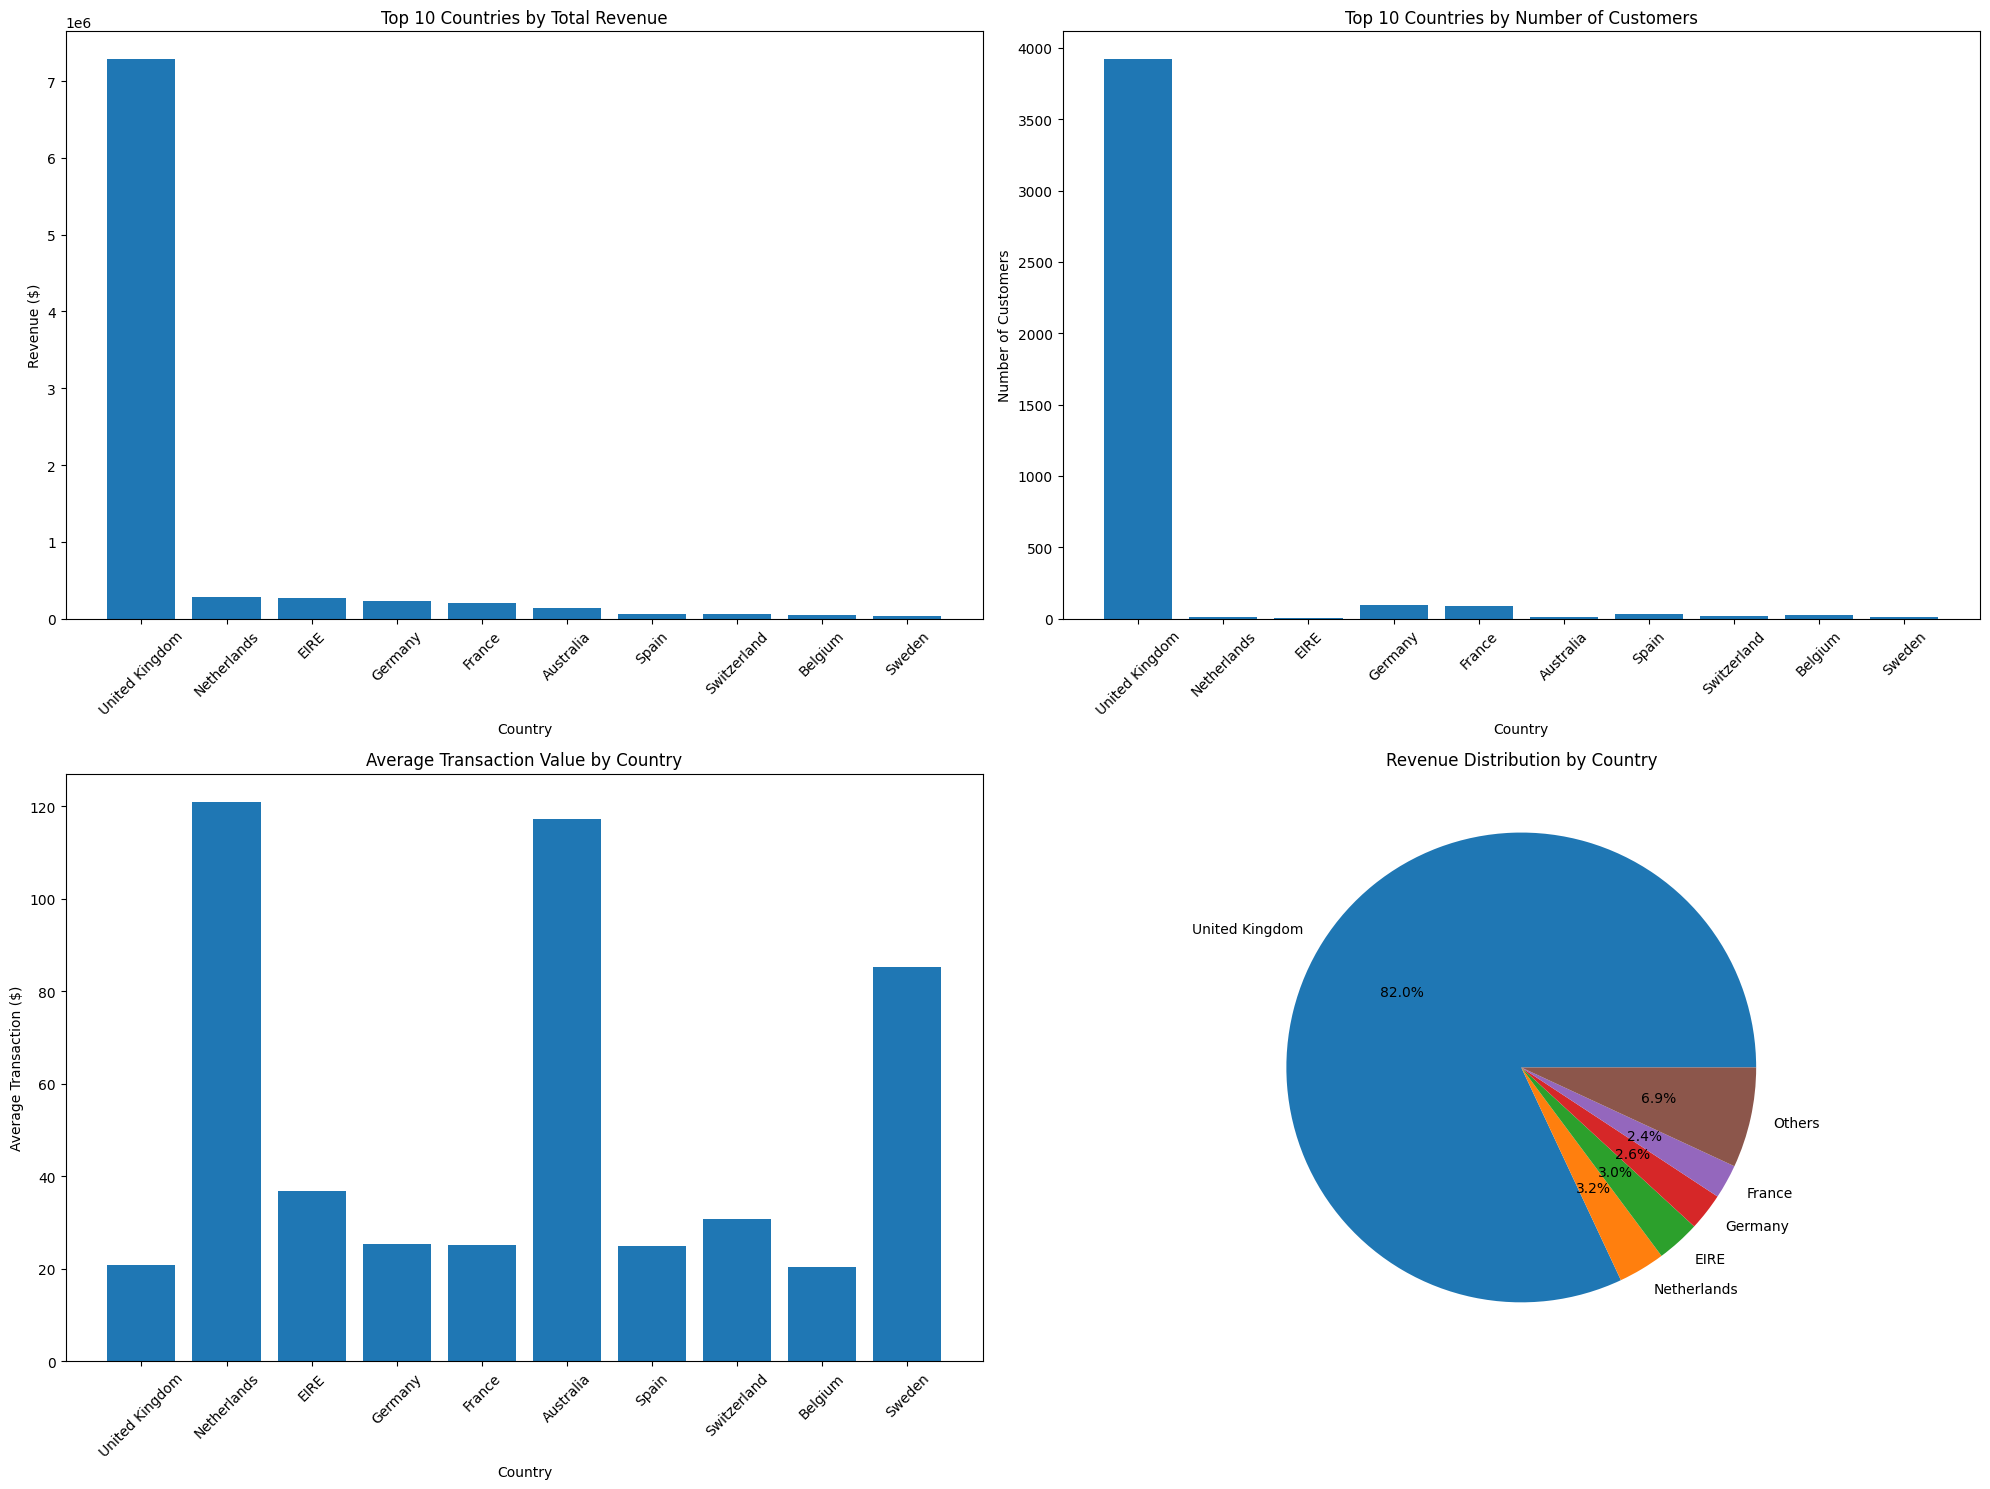


=== 3. PRODUCT ANALYSIS ===
Top 20 Products by Revenue:
                                              Total_Quantity_Sold  \
StockCode Description                                               
23843     PAPER CRAFT , LITTLE BIRDIE                       80995   
22423     REGENCY CAKESTAND 3 TIER                          12374   
85123A    WHITE HANGING HEART T-LIGHT HOLDER                36706   
85099B    JUMBO BAG RED RETROSPOT                           46078   
23166     MEDIUM CERAMIC TOP STORAGE JAR                    77916   
POST      POSTAGE                                            3120   
47566     PARTY BUNTING                                     15279   
84879     ASSORTED COLOUR BIRD ORNAMENT                     35263   
M         Manual                                             6933   
23084     RABBIT NIGHT LIGHT                                27153   
79321     CHILLI LIGHTS                                      9646   
22086     PAPER CHAIN KIT 50'S CHRISTMAS      

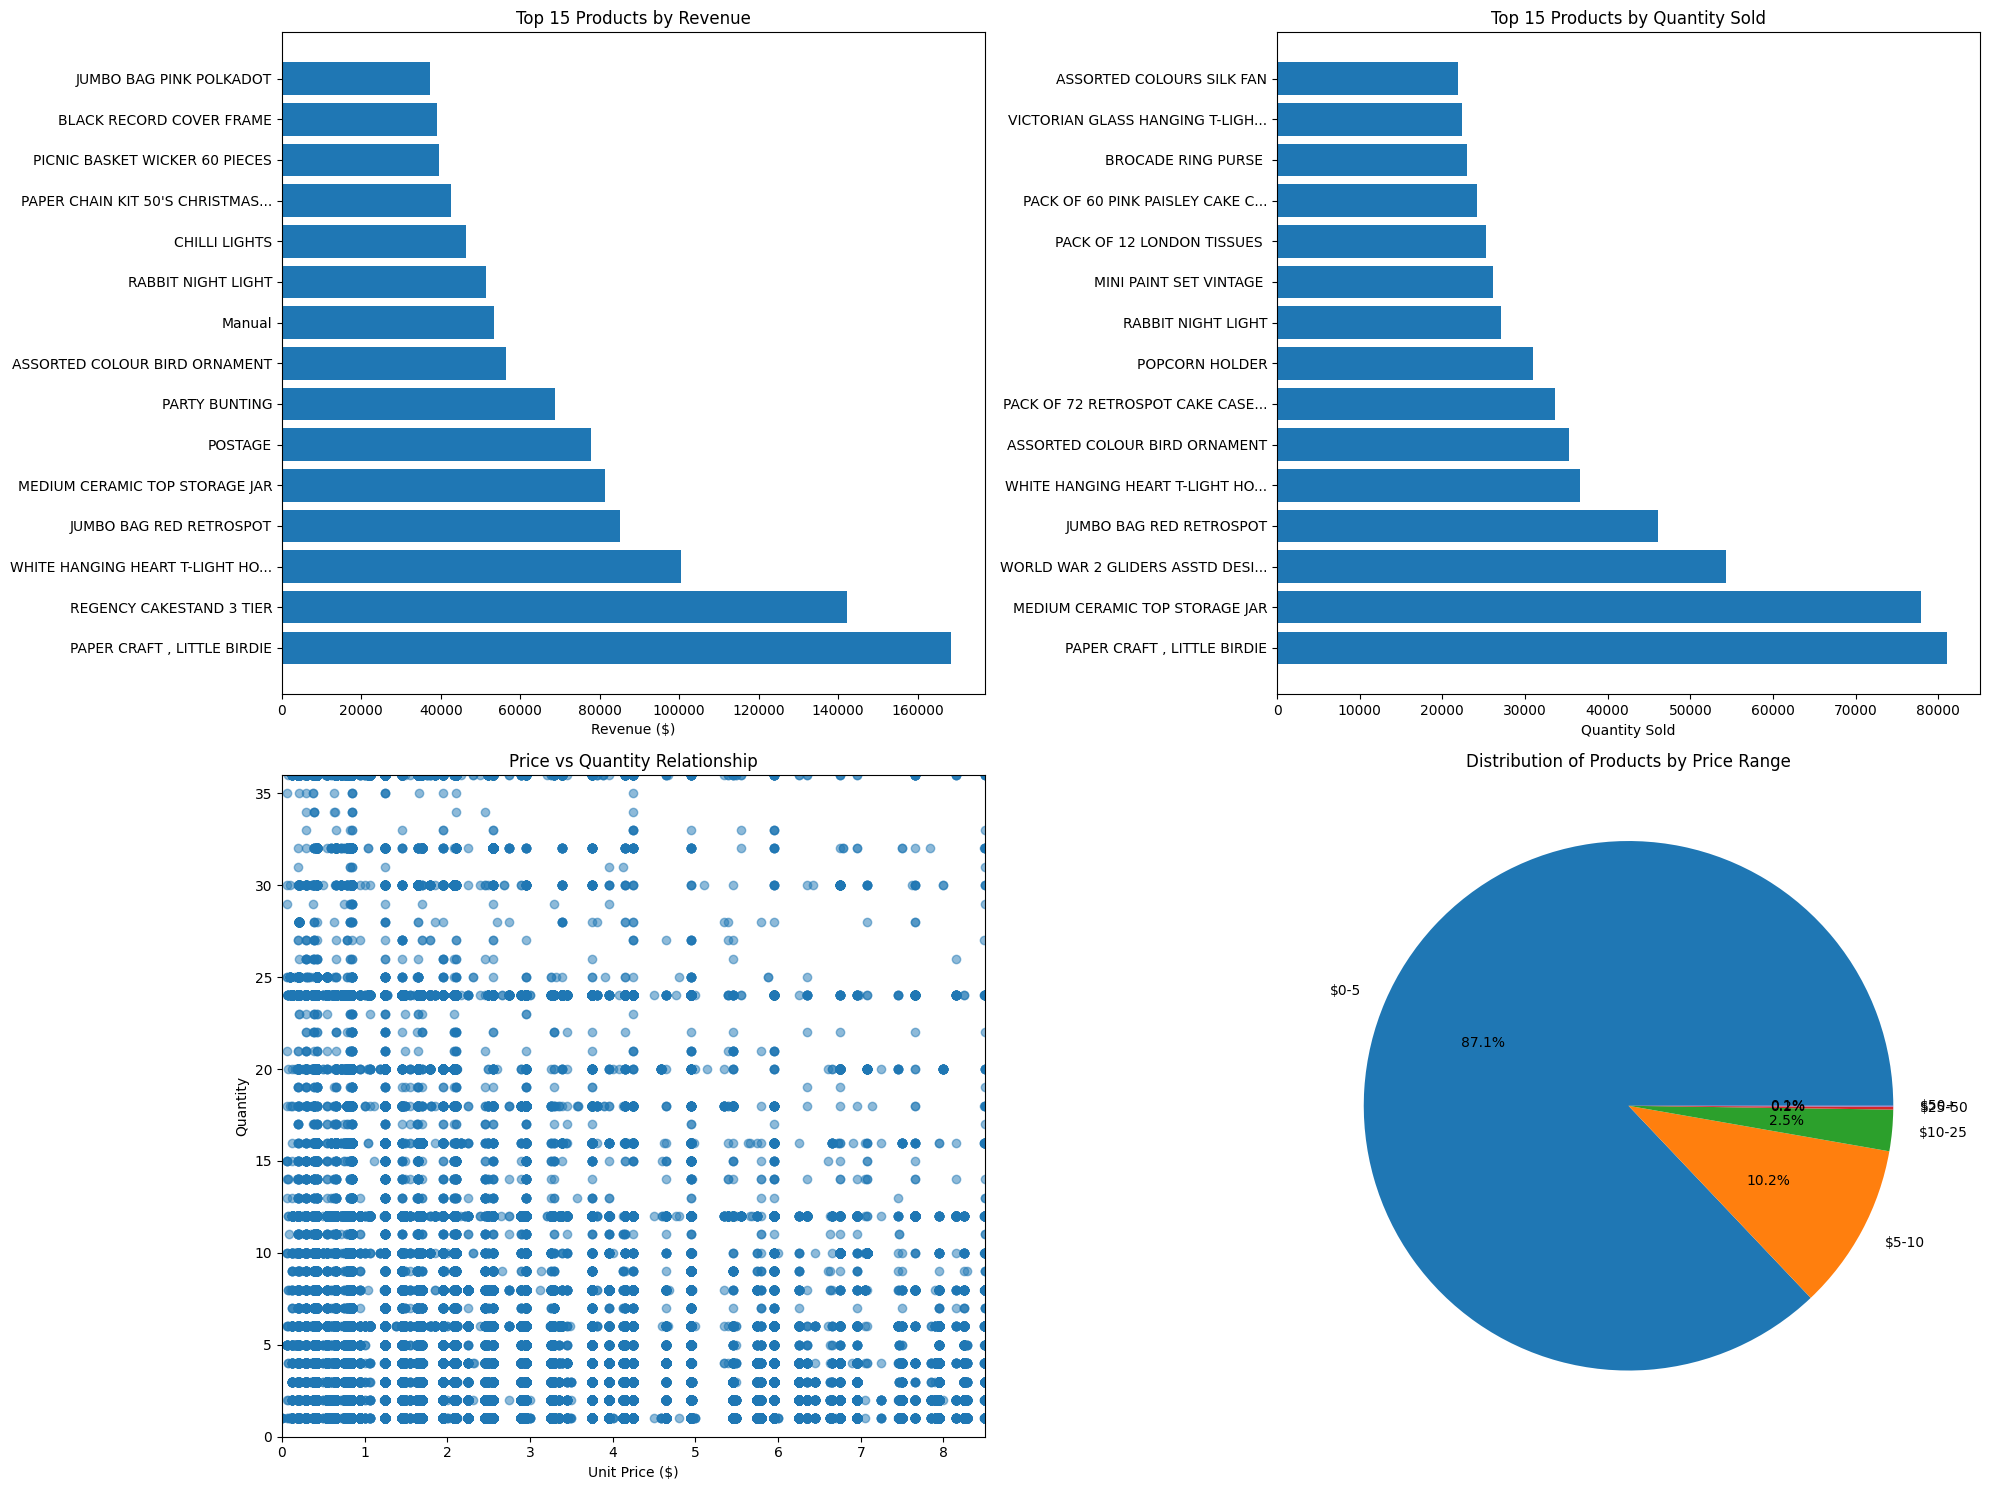


=== 4. TEMPORAL ANALYSIS ===
Monthly Transaction Trends:
   Year  Month  InvoiceNo  TotalAmount  CustomerID
0  2022     12       1400   570422.730         885
1  2023      1        987   568101.310         741
2  2023      2        997   446084.920         758
3  2023      3       1321   594081.760         974
4  2023      4       1149   468374.331         856
5  2023      5       1555   677355.150        1056
6  2023      6       1393   660046.050         991
7  2023      7       1331   598962.901         949
8  2023      8       1280   644051.040         935
9  2023      9       1755   950690.202        1266


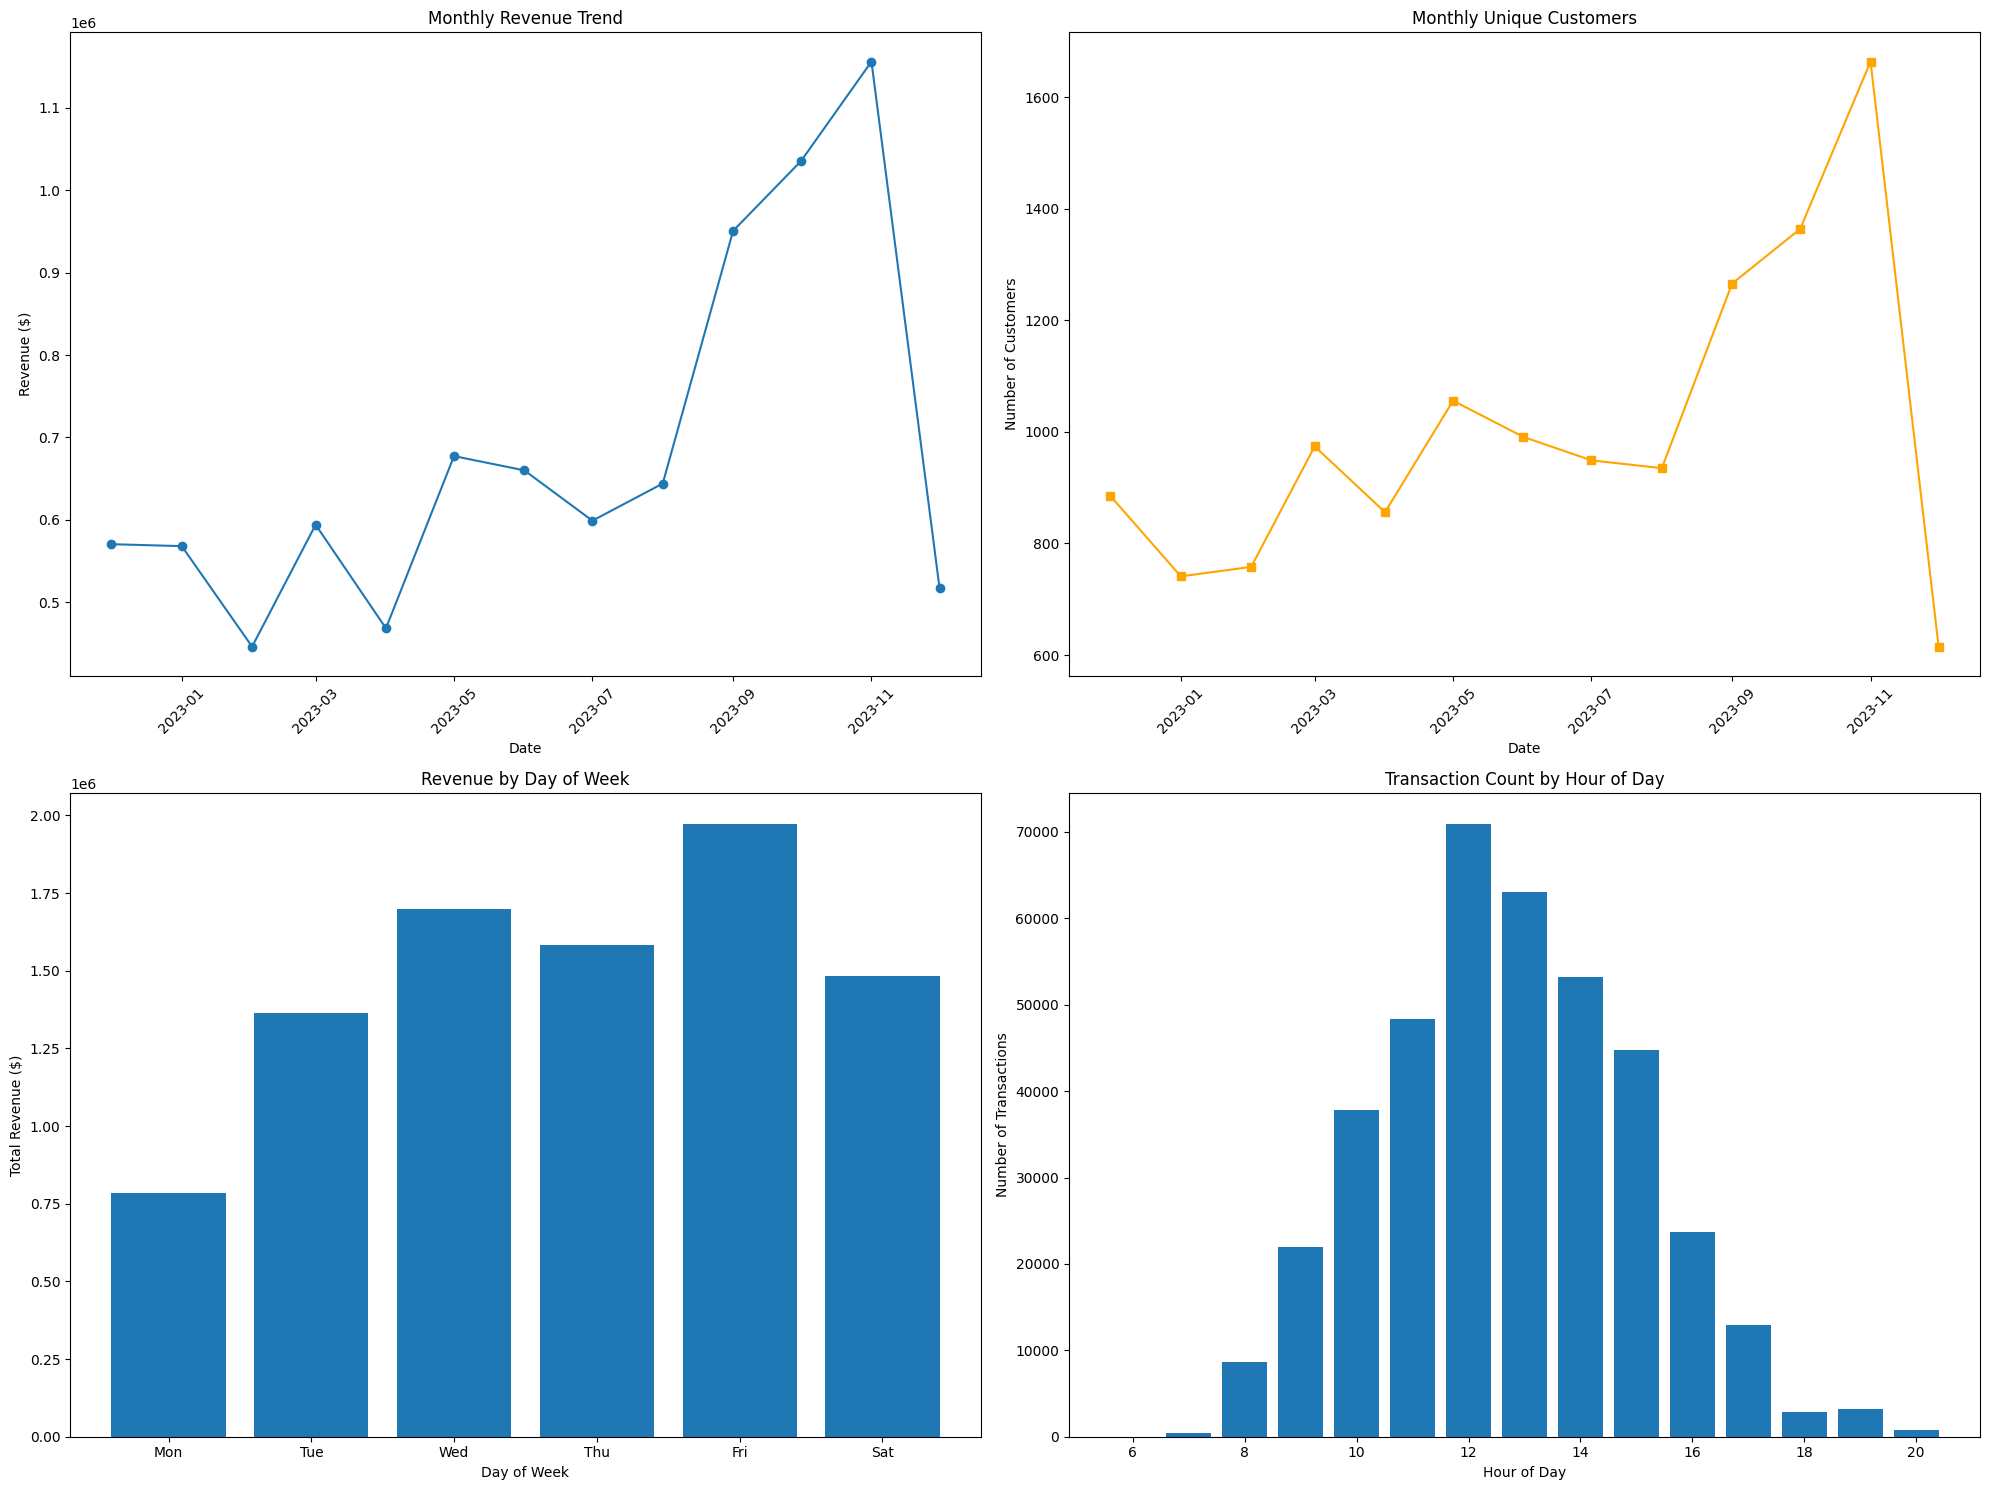


=== 5. CUSTOMER BEHAVIOR ANALYSIS ===
Customer Behavior Statistics:
            Orders   Total_Spend  Avg_Order_Value  Recency_Days
count  4338.000000    4338.00000      4338.000000   4338.000000
mean      4.272015    2048.68808        68.381554     91.536422
std       7.697998    8985.23022      1467.918294    100.014169
min       1.000000       3.75000         2.140000      0.000000
25%       1.000000     306.48250        12.390000     17.000000
50%       2.000000     668.57000        17.755000     50.000000
75%       5.000000    1660.59750        24.877500    141.000000
max     209.000000  280206.02000     77183.600000    373.000000

Basic Customer Segmentation:
Customer_Type
Regular       2397
At Risk        870
VIP            636
Frequent       224
High Value     211
Name: count, dtype: int64


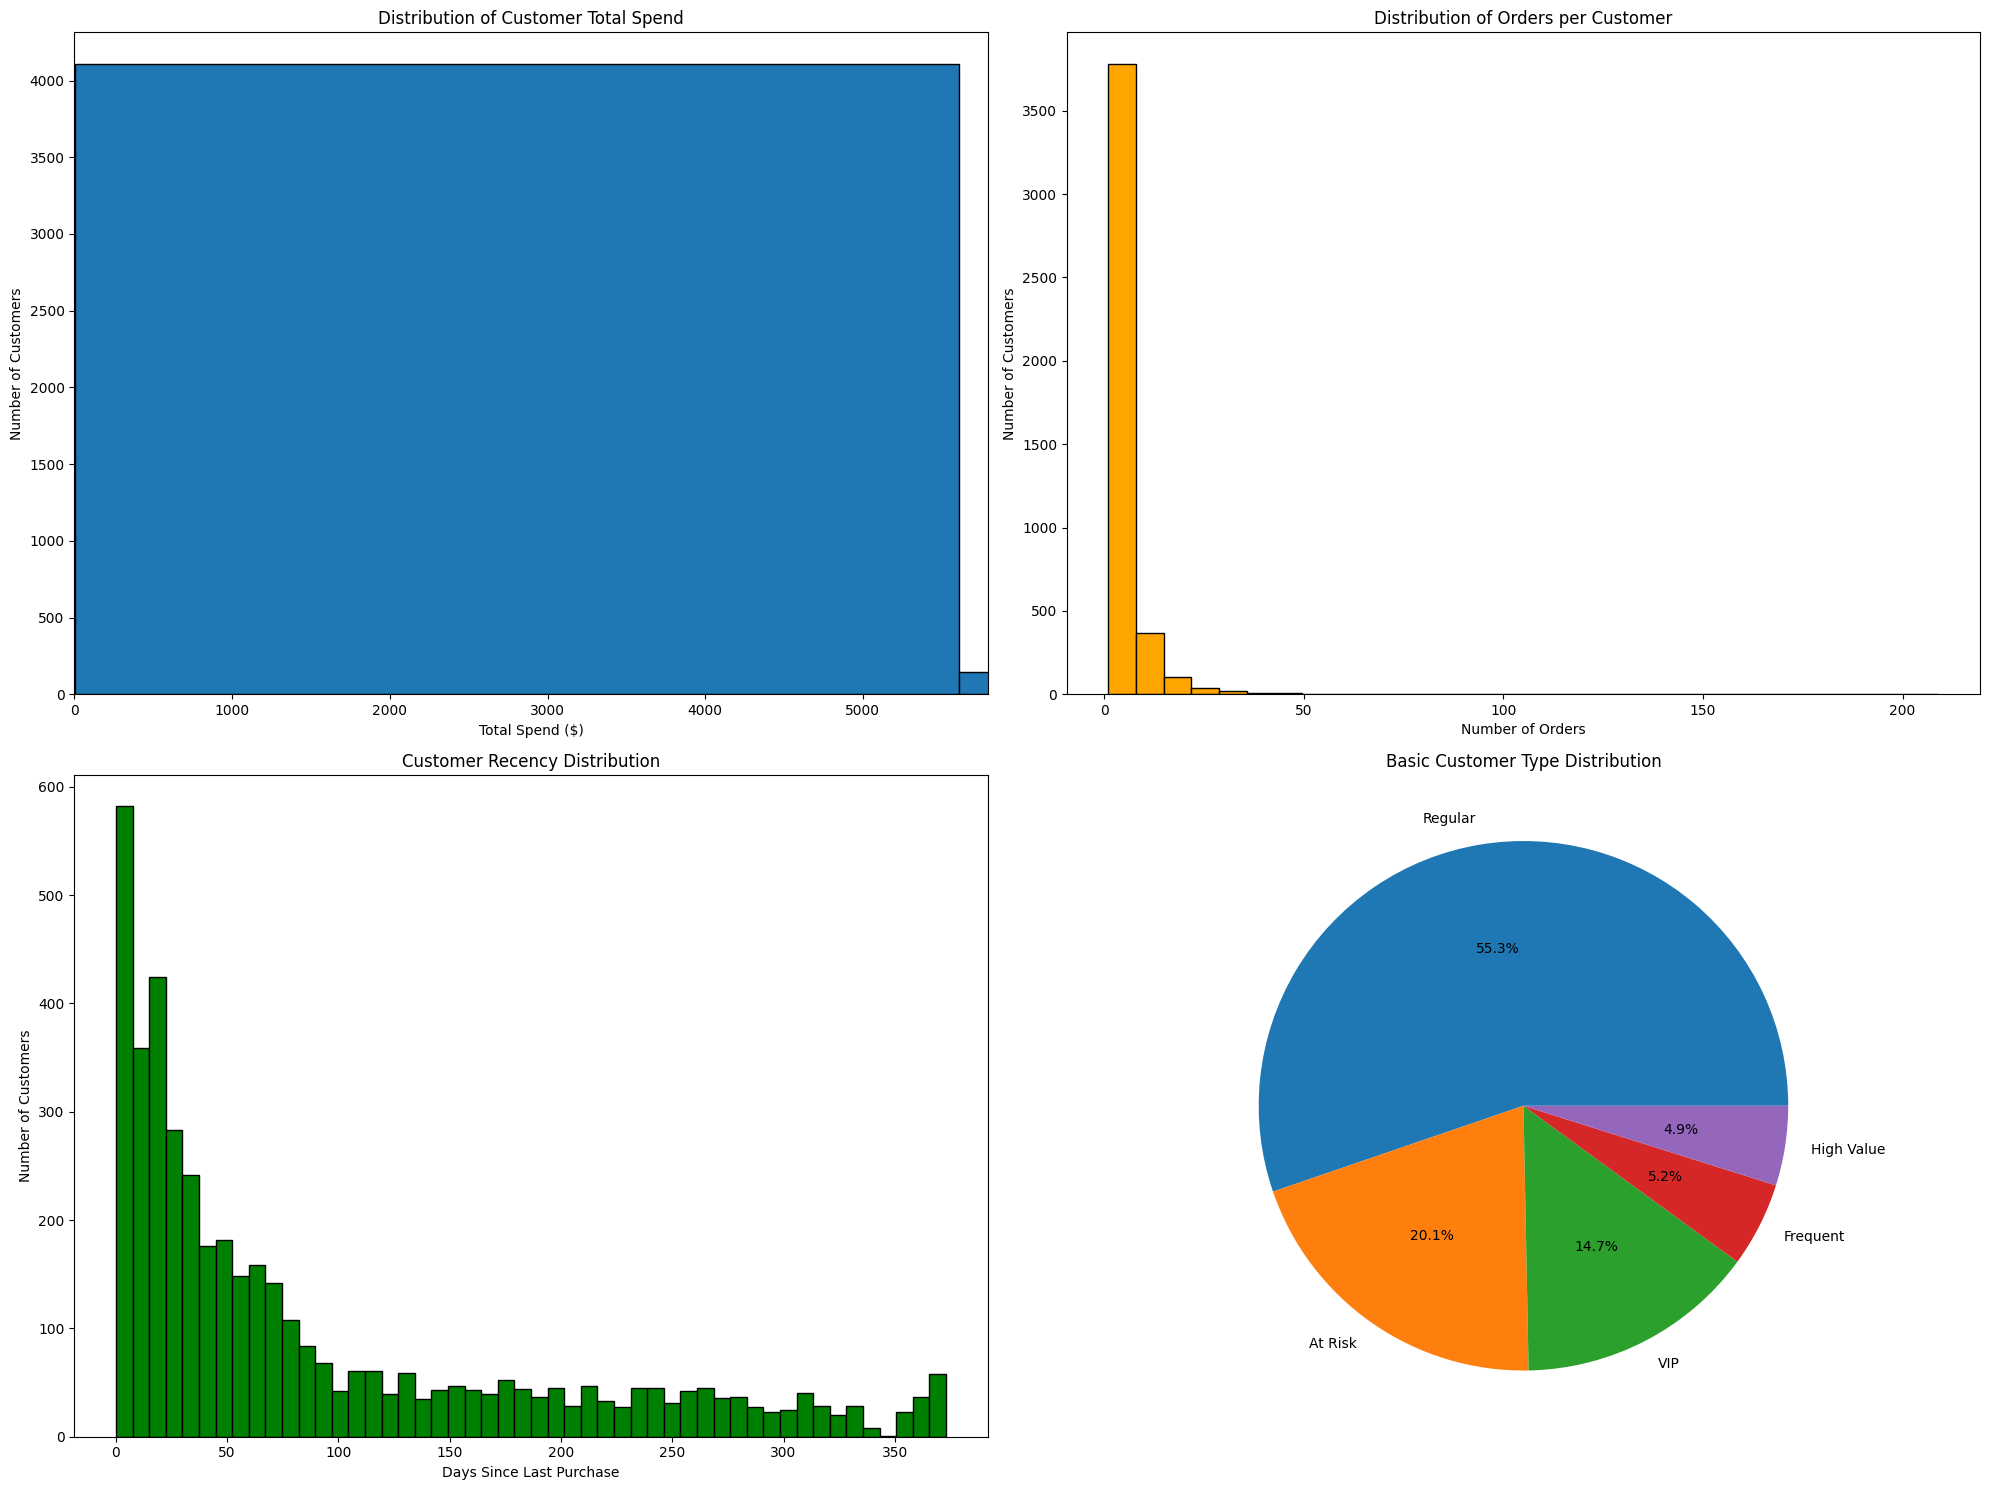


=== 6. MONETARY ANALYSIS ===
• Total Revenue: $8,887,208.89
• Average Transaction: $22.63
• Median Transaction: $12.45
• Largest Transaction: $168469.60
• Smallest Transaction: $0.00
• Standard Deviation: $311.10

Revenue Breakdown:
Top 3 months: {(2023, 11): 1156205.61, (2023, 10): 1035642.45, (2023, 9): 950690.202}
Top 3 countries: {'United Kingdom': 7285024.644, 'Netherlands': 285446.34, 'EIRE': 265262.46}


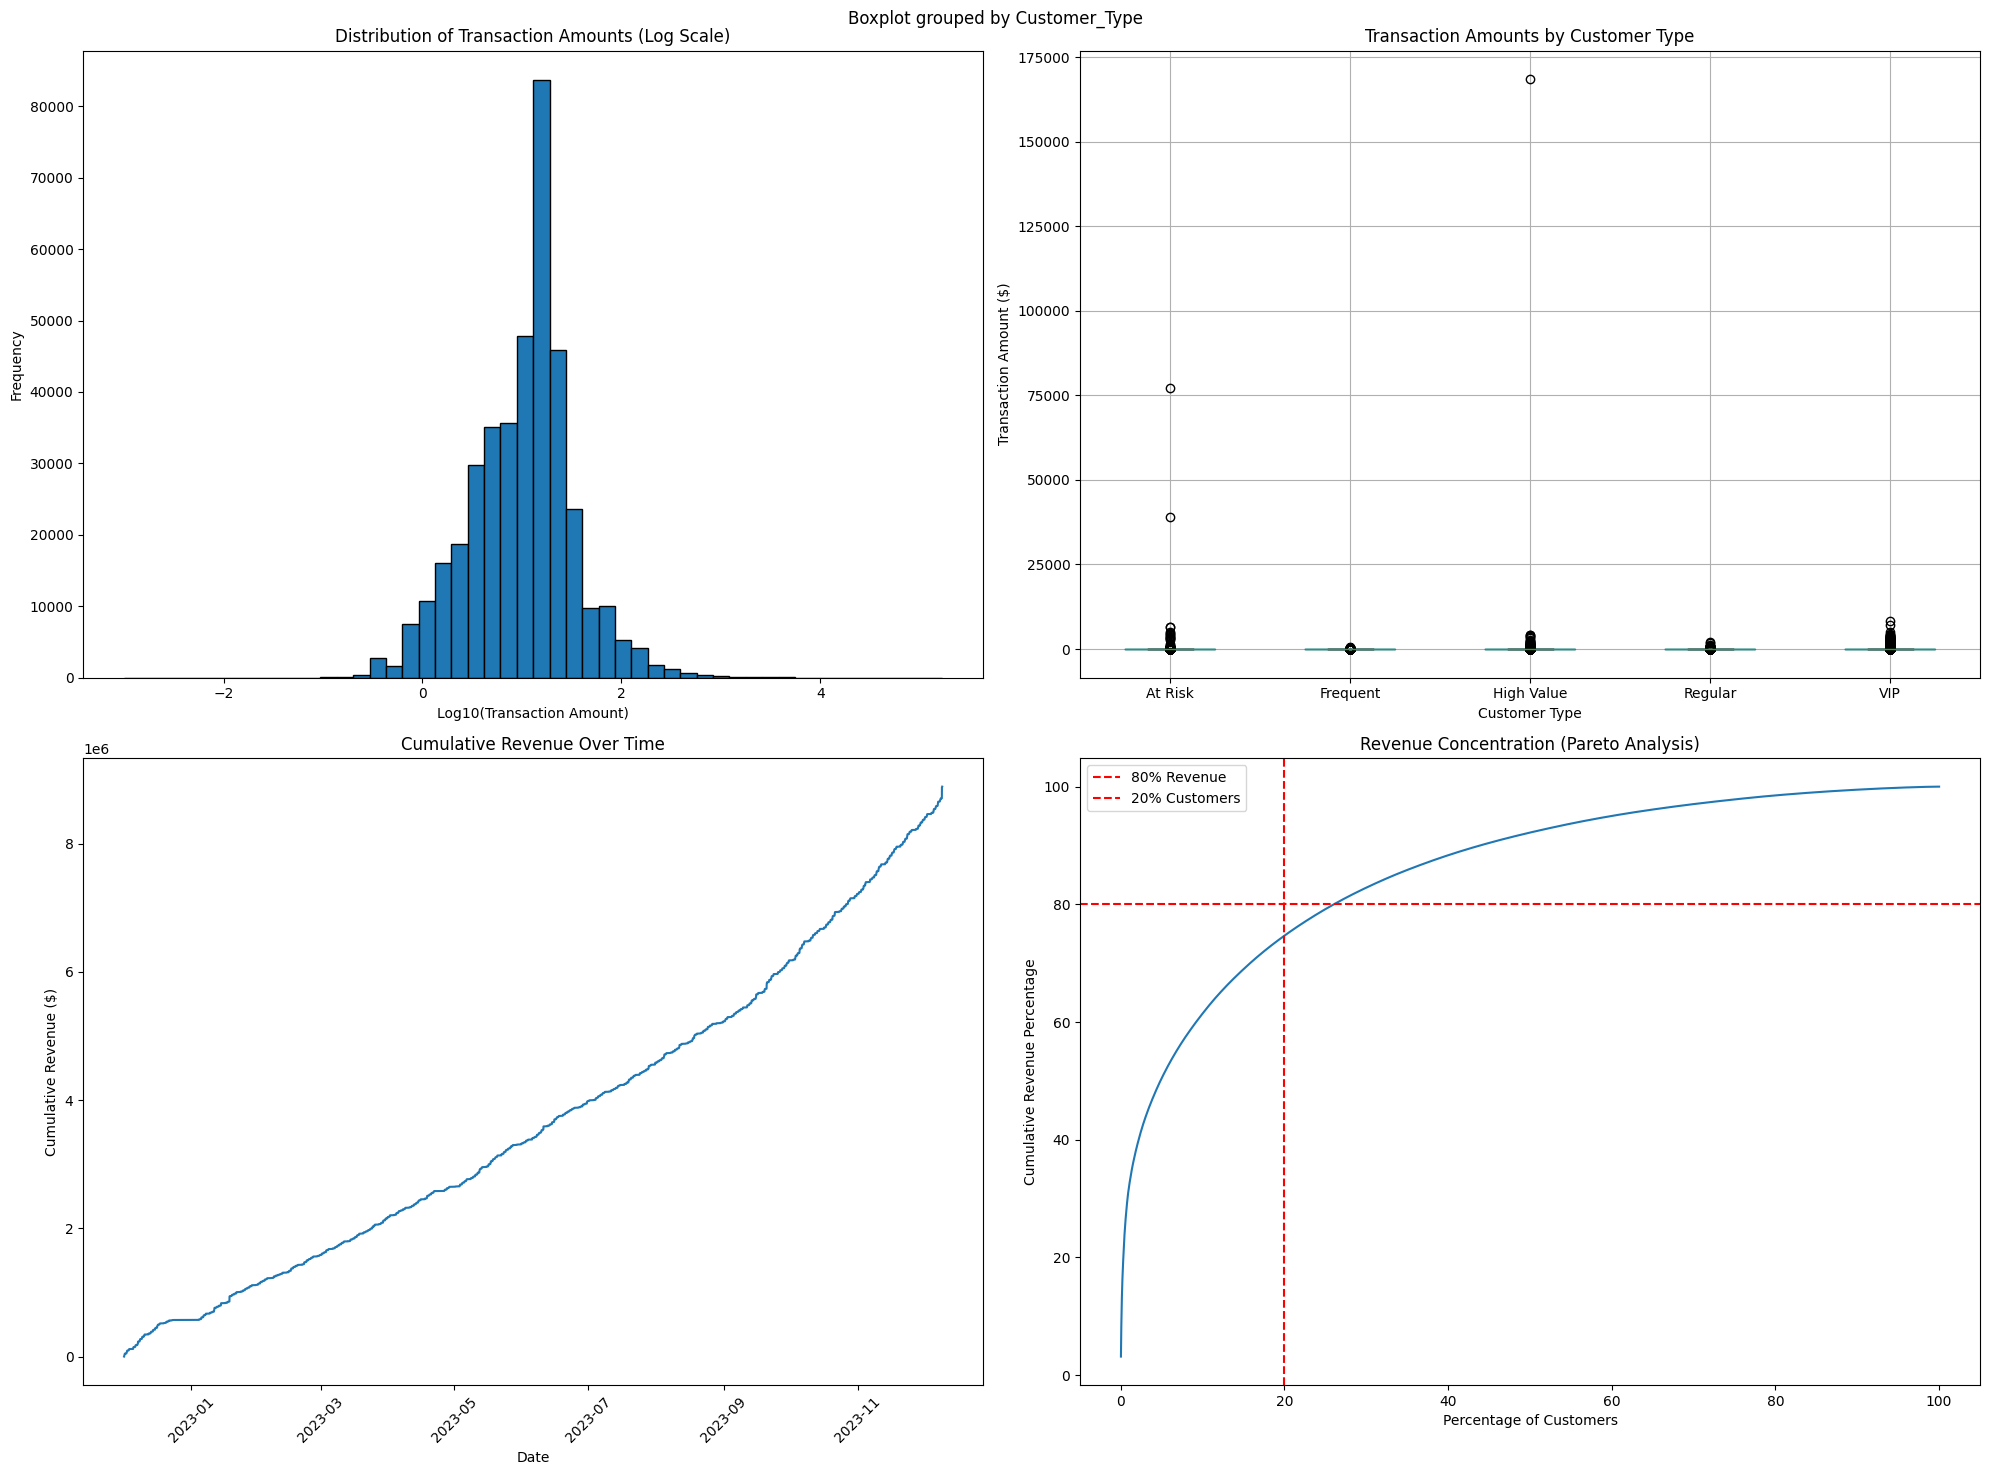


=== 7. RFM PRELIMINARY ANALYSIS ===
RFM Metrics Summary:
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     91.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       0.000000     1.000000       3.750000
25%      17.000000     1.000000     306.482500
50%      50.000000     2.000000     668.570000
75%     141.000000     5.000000    1660.597500
max     373.000000   209.000000  280206.020000

Sample RFM Scores:
   CustomerID  Recency  Frequency  Monetary RFM_Score
0       12346      325          1  77183.60       115
1       12347        1          7   4310.00       555
2       12348       74          4   1797.24       244
3       12349       18          1   1757.55       414
4       12350      309          1    334.40       112
5       12352       35          8   2506.04       355
6       12353      203          1     89.00       111
7       12354      231          1   1079.40       114
8       12355

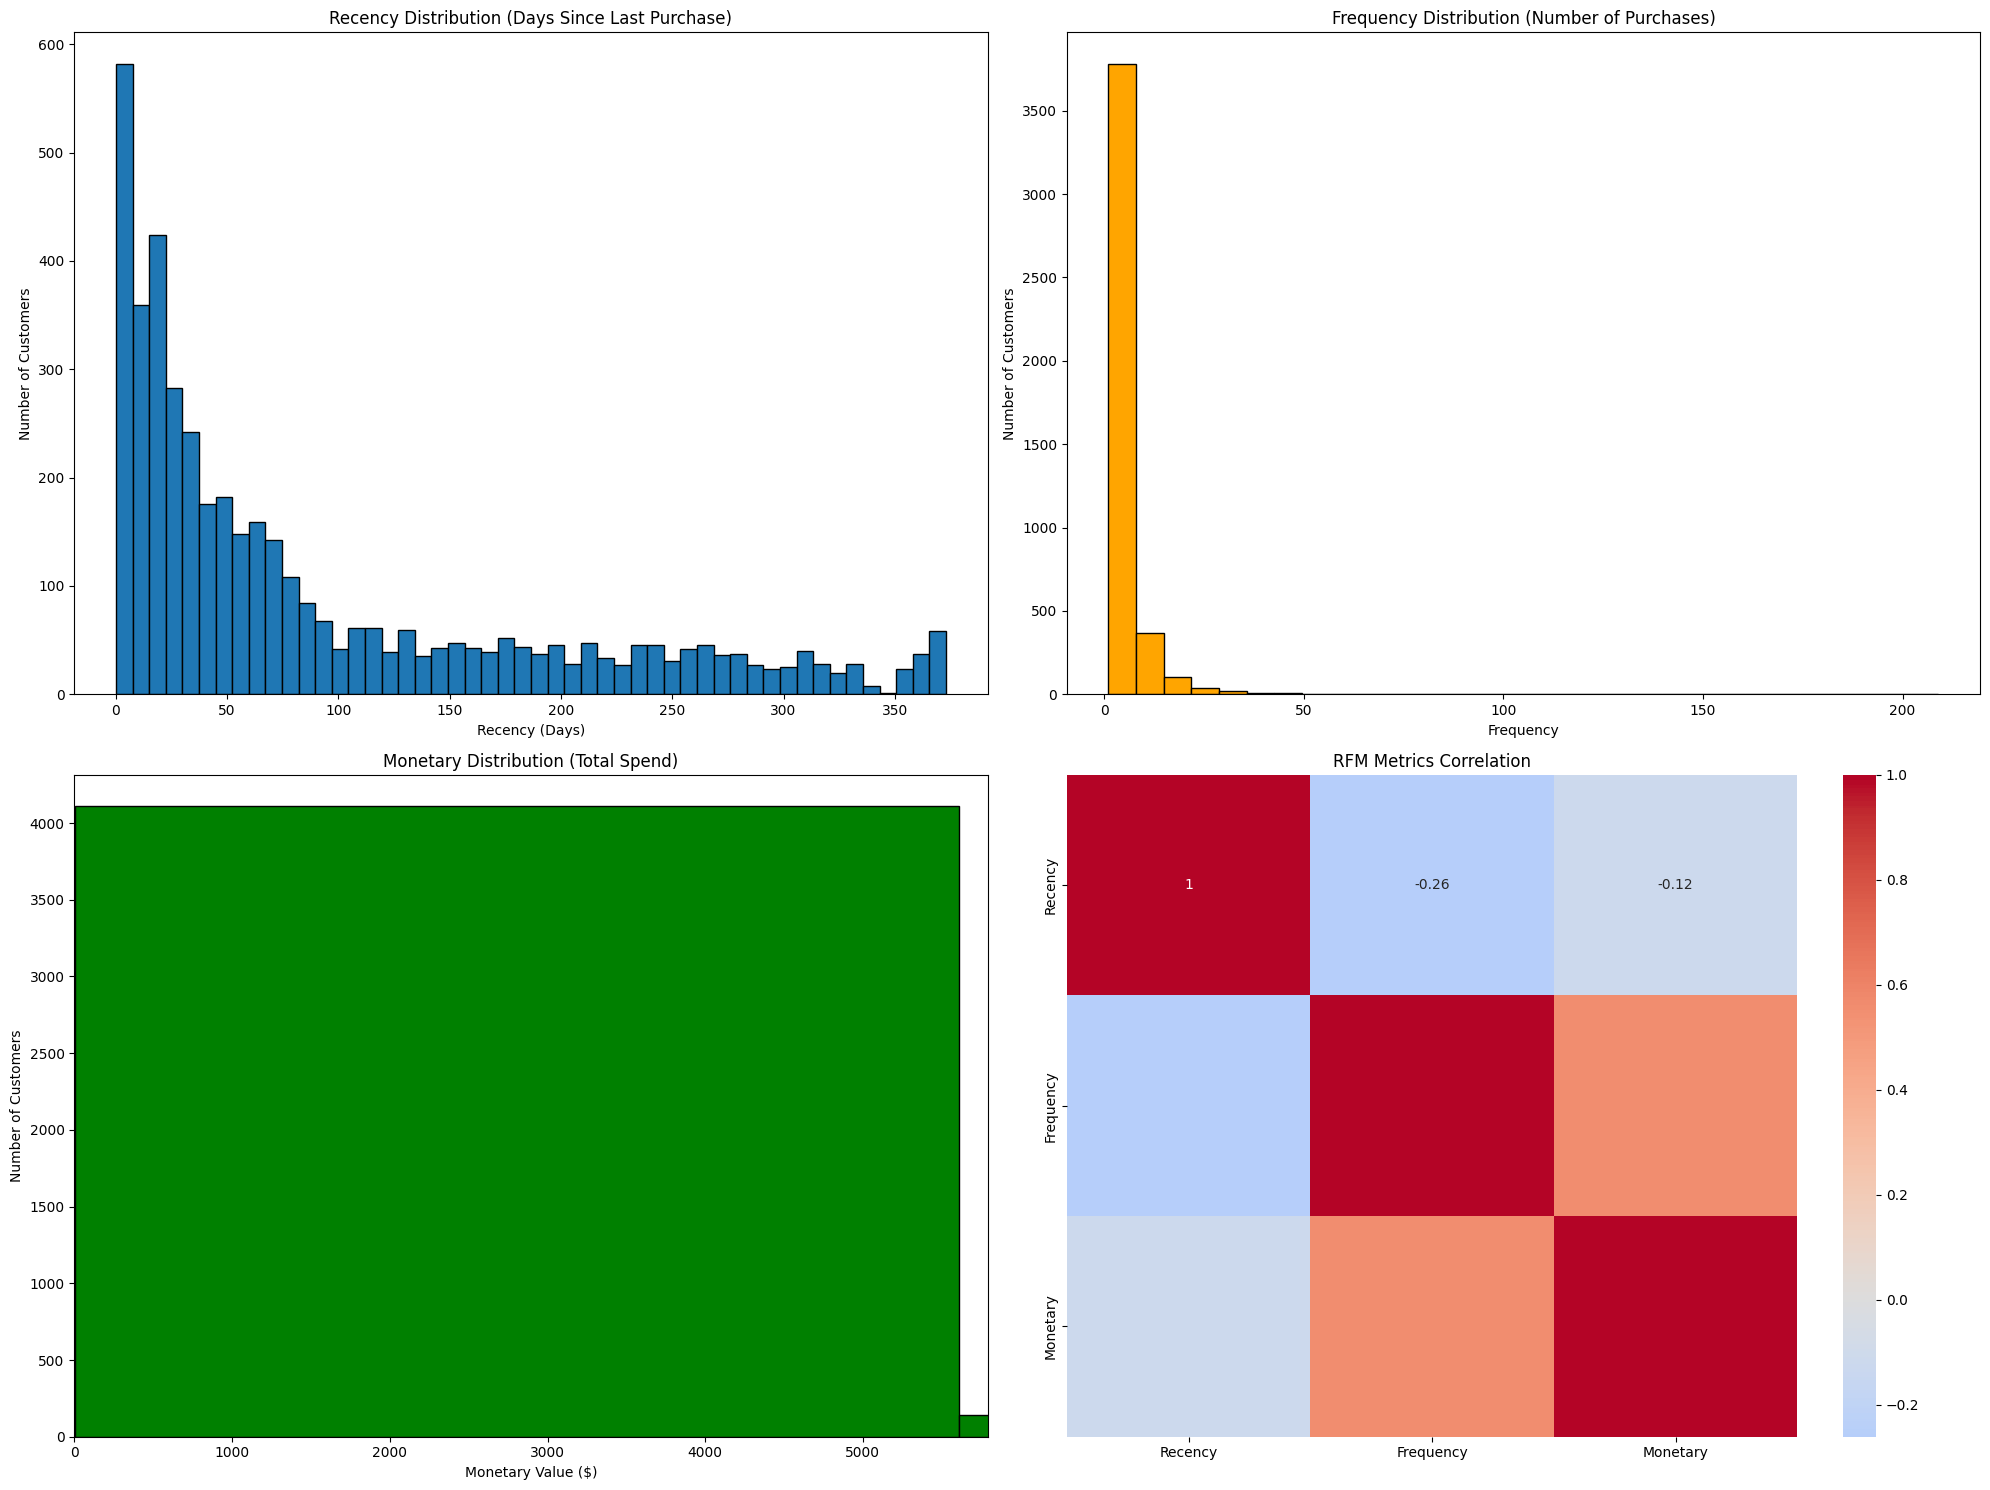


=== 8. ADVANCED BUSINESS INSIGHTS ===
Seasonal Revenue Analysis:
   Year  Quarter  TotalAmount  CustomerID  InvoiceNo
0  2022        4   570422.730         885       1400
1  2023        1  1608267.990        1776       3305
2  2023        2  1805775.531        1991       4097
3  2023        3  2193704.143        2161       4366
4  2023        4  2709038.500        2560       5364

Customer Lifecycle Insights:
Average customer lifetime: 130.4 days
Average purchase frequency: 12.20 purchases per month

Top 5 Trending Products (by revenue growth):
1. 22633: HAND WARMER UNION JACK (Growth: 1972.02%)
2. 22632: HAND WARMER RED POLKA DOT (Growth: 985.49%)
3. 84029E: RED WOOLLY HOTTIE WHITE HEART. (Growth: 588.49%)
4. 22086: PAPER CHAIN KIT 50'S CHRISTMAS  (Growth: 567.55%)
5. 22310: IVORY KNITTED MUG COSY  (Growth: 272.18%)

=== 9. KEY BUSINESS INSIGHTS ===
🎯 KEY BUSINESS INSIGHTS:
1. Customer Base: 4,338 active customers generating $8,887,208.89
2. Average Customer Value: $2048.69
3. Geogra

In [6]:
# 1. DATASET OVERVIEW AND STATISTICS
print("=== 1. DATASET OVERVIEW ===")

overview_stats = {
    'Total Transactions': len(df),
    'Unique Customers': df['CustomerID'].nunique(),
    'Unique Products': df['StockCode'].nunique(),
    'Unique Countries': df['Country'].nunique(),
    'Total Revenue': f"${df['TotalAmount'].sum():,.2f}",
    'Average Transaction Value': f"${df['TotalAmount'].mean():.2f}",
    'Date Range': f"{(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days"
}

for metric, value in overview_stats.items():
    print(f"• {metric}: {value}")

# Statistical summary
print("\n📈 Statistical Summary:")
print(df[['Quantity', 'UnitPrice', 'TotalAmount']].describe())

# %%
# 2. TRANSACTION VOLUME ANALYSIS BY COUNTRY
print("\n=== 2. GEOGRAPHIC ANALYSIS ===")

# Country-wise transaction analysis
country_analysis = df.groupby('Country').agg({
    'InvoiceNo': 'nunique',  # Unique invoices
    'CustomerID': 'nunique',  # Unique customers
    'TotalAmount': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)

country_analysis.columns = ['Unique_Invoices', 'Unique_Customers', 'Total_Revenue', 'Avg_Transaction', 'Total_Quantity']
country_analysis = country_analysis.sort_values('Total_Revenue', ascending=False)

print("Top 10 Countries by Revenue:")
print(country_analysis.head(10))

# Visualization: Top countries
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Top 10 countries by revenue
top_countries = country_analysis.head(10)
axes[0, 0].bar(range(len(top_countries)), top_countries['Total_Revenue'])
axes[0, 0].set_title('Top 10 Countries by Total Revenue')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].set_xticks(range(len(top_countries)))
axes[0, 0].set_xticklabels(top_countries.index, rotation=45)

# Top 10 countries by number of customers
axes[0, 1].bar(range(len(top_countries)), top_countries['Unique_Customers'])
axes[0, 1].set_title('Top 10 Countries by Number of Customers')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].set_xticks(range(len(top_countries)))
axes[0, 1].set_xticklabels(top_countries.index, rotation=45)

# Average transaction value by country
axes[1, 0].bar(range(len(top_countries)), top_countries['Avg_Transaction'])
axes[1, 0].set_title('Average Transaction Value by Country')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Average Transaction ($)')
axes[1, 0].set_xticks(range(len(top_countries)))
axes[1, 0].set_xticklabels(top_countries.index, rotation=45)

# Revenue distribution pie chart (top 5 + others)
top_5_countries = country_analysis.head(5)
others_revenue = country_analysis.iloc[5:]['Total_Revenue'].sum()
pie_data = list(top_5_countries['Total_Revenue']) + [others_revenue]
pie_labels = list(top_5_countries.index) + ['Others']

axes[1, 1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
axes[1, 1].set_title('Revenue Distribution by Country')

plt.tight_layout()
plt.show()

# %%
# 3. TOP-SELLING PRODUCTS ANALYSIS
print("\n=== 3. PRODUCT ANALYSIS ===")

# Product performance analysis
product_analysis = df.groupby(['StockCode', 'Description']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).round(2)

product_analysis.columns = ['Total_Quantity_Sold', 'Total_Revenue', 'Number_of_Orders', 'Unique_Customers']
product_analysis = product_analysis.sort_values('Total_Revenue', ascending=False)

print("Top 20 Products by Revenue:")
print(product_analysis.head(20))

# Most popular products by quantity
top_products_qty = product_analysis.sort_values('Total_Quantity_Sold', ascending=False).head(15)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Top products by revenue
top_products_revenue = product_analysis.head(15)
axes[0, 0].barh(range(len(top_products_revenue)), top_products_revenue['Total_Revenue'])
axes[0, 0].set_title('Top 15 Products by Revenue')
axes[0, 0].set_xlabel('Revenue ($)')
axes[0, 0].set_yticks(range(len(top_products_revenue)))
axes[0, 0].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc 
                           for desc in top_products_revenue.index.get_level_values('Description')])

# Top products by quantity sold
axes[0, 1].barh(range(len(top_products_qty)), top_products_qty['Total_Quantity_Sold'])
axes[0, 1].set_title('Top 15 Products by Quantity Sold')
axes[0, 1].set_xlabel('Quantity Sold')
axes[0, 1].set_yticks(range(len(top_products_qty)))
axes[0, 1].set_yticklabels([desc[:30] + '...' if len(desc) > 30 else desc 
                           for desc in top_products_qty.index.get_level_values('Description')])

# Price vs Quantity scatter plot
axes[1, 0].scatter(df['UnitPrice'], df['Quantity'], alpha=0.5)
axes[1, 0].set_title('Price vs Quantity Relationship')
axes[1, 0].set_xlabel('Unit Price ($)')
axes[1, 0].set_ylabel('Quantity')
axes[1, 0].set_xlim(0, df['UnitPrice'].quantile(0.95))
axes[1, 0].set_ylim(0, df['Quantity'].quantile(0.95))

# Product diversity analysis
price_ranges = pd.cut(df['UnitPrice'], bins=[0, 5, 10, 25, 50, float('inf')], 
                     labels=['$0-5', '$5-10', '$10-25', '$25-50', '$50+'])
price_distribution = price_ranges.value_counts()

axes[1, 1].pie(price_distribution.values, labels=price_distribution.index, autopct='%1.1f%%')
axes[1, 1].set_title('Distribution of Products by Price Range')

plt.tight_layout()
plt.show()

# %%
# 4. PURCHASE TRENDS OVER TIME
print("\n=== 4. TEMPORAL ANALYSIS ===")

# Monthly trends
monthly_trends = df.groupby(['Year', 'Month']).agg({
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

monthly_trends['Date'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(day=1))
monthly_trends = monthly_trends.sort_values('Date')

print("Monthly Transaction Trends:")
print(monthly_trends[['Year', 'Month', 'InvoiceNo', 'TotalAmount', 'CustomerID']].head(10))

# Weekly and hourly patterns
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour
weekly_pattern = df.groupby('DayOfWeek')['TotalAmount'].agg(['count', 'sum']).reset_index()
weekly_pattern['DayName'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

hourly_pattern = df.groupby('Hour')['TotalAmount'].agg(['count', 'sum']).reset_index()

# Temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Monthly revenue trend
axes[0, 0].plot(monthly_trends['Date'], monthly_trends['TotalAmount'], marker='o')
axes[0, 0].set_title('Monthly Revenue Trend')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Monthly customer count
axes[0, 1].plot(monthly_trends['Date'], monthly_trends['CustomerID'], marker='s', color='orange')
axes[0, 1].set_title('Monthly Unique Customers')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].tick_params(axis='x', rotation=45)

# Weekly pattern
axes[1, 0].bar(weekly_pattern['DayName'], weekly_pattern['sum'])
axes[1, 0].set_title('Revenue by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Total Revenue ($)')

# Hourly pattern
axes[1, 1].bar(hourly_pattern['Hour'], hourly_pattern['count'])
axes[1, 1].set_title('Transaction Count by Hour of Day')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

# %%
# 5. CUSTOMER BEHAVIOR ANALYSIS
print("\n=== 5. CUSTOMER BEHAVIOR ANALYSIS ===")

# Customer-level analysis
customer_behavior = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of orders
    'TotalAmount': ['sum', 'mean'],  # Total and average spend
    'Quantity': 'sum',  # Total items purchased
    'InvoiceDate': ['min', 'max'],  # First and last purchase
    'StockCode': 'nunique'  # Number of different products
}).round(2)

customer_behavior.columns = ['Orders', 'Total_Spend', 'Avg_Order_Value', 'Total_Items', 
                           'First_Purchase', 'Last_Purchase', 'Unique_Products']

# Calculate customer lifetime and recency
latest_date = df['InvoiceDate'].max()
customer_behavior['Customer_Lifetime_Days'] = (customer_behavior['Last_Purchase'] - customer_behavior['First_Purchase']).dt.days
customer_behavior['Recency_Days'] = (latest_date - customer_behavior['Last_Purchase']).dt.days

print("Customer Behavior Statistics:")
print(customer_behavior[['Orders', 'Total_Spend', 'Avg_Order_Value', 'Recency_Days']].describe())

# Customer segmentation preview (basic)
customer_behavior['Customer_Type'] = 'Regular'
customer_behavior.loc[customer_behavior['Total_Spend'] >= customer_behavior['Total_Spend'].quantile(0.8), 'Customer_Type'] = 'High Value'
customer_behavior.loc[customer_behavior['Orders'] >= customer_behavior['Orders'].quantile(0.8), 'Customer_Type'] = 'Frequent'
customer_behavior.loc[(customer_behavior['Total_Spend'] >= customer_behavior['Total_Spend'].quantile(0.8)) & 
                     (customer_behavior['Orders'] >= customer_behavior['Orders'].quantile(0.8)), 'Customer_Type'] = 'VIP'
customer_behavior.loc[customer_behavior['Recency_Days'] >= customer_behavior['Recency_Days'].quantile(0.8), 'Customer_Type'] = 'At Risk'

customer_type_summary = customer_behavior['Customer_Type'].value_counts()
print(f"\nBasic Customer Segmentation:")
print(customer_type_summary)

# Customer behavior visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Distribution of customer total spend
axes[0, 0].hist(customer_behavior['Total_Spend'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Customer Total Spend')
axes[0, 0].set_xlabel('Total Spend ($)')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].set_xlim(0, customer_behavior['Total_Spend'].quantile(0.95))

# Distribution of number of orders per customer
axes[0, 1].hist(customer_behavior['Orders'], bins=30, edgecolor='black', color='orange')
axes[0, 1].set_title('Distribution of Orders per Customer')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Number of Customers')

# Customer recency distribution
axes[1, 0].hist(customer_behavior['Recency_Days'], bins=50, edgecolor='black', color='green')
axes[1, 0].set_title('Customer Recency Distribution')
axes[1, 0].set_xlabel('Days Since Last Purchase')
axes[1, 0].set_ylabel('Number of Customers')

# Customer type distribution
axes[1, 1].pie(customer_type_summary.values, labels=customer_type_summary.index, autopct='%1.1f%%')
axes[1, 1].set_title('Basic Customer Type Distribution')

plt.tight_layout()
plt.show()

# %%
# 6. MONETARY DISTRIBUTION ANALYSIS
print("\n=== 6. MONETARY ANALYSIS ===")

# Transaction value analysis
transaction_stats = {
    'Total Revenue': f"${df['TotalAmount'].sum():,.2f}",
    'Average Transaction': f"${df['TotalAmount'].mean():.2f}",
    'Median Transaction': f"${df['TotalAmount'].median():.2f}",
    'Largest Transaction': f"${df['TotalAmount'].max():.2f}",
    'Smallest Transaction': f"${df['TotalAmount'].min():.2f}",
    'Standard Deviation': f"${df['TotalAmount'].std():.2f}"
}

for metric, value in transaction_stats.items():
    print(f"• {metric}: {value}")

# Revenue by different dimensions
revenue_by_month = df.groupby(['Year', 'Month'])['TotalAmount'].sum()
revenue_by_country = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
revenue_by_customer_type = customer_behavior.groupby('Customer_Type')['Total_Spend'].sum()

print(f"\nRevenue Breakdown:")
print(f"Top 3 months: {revenue_by_month.sort_values(ascending=False).head(3).to_dict()}")
print(f"Top 3 countries: {revenue_by_country.head(3).to_dict()}")

# Monetary visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Transaction amount distribution (log scale for better view)
axes[0, 0].hist(np.log10(df['TotalAmount']), bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Transaction Amounts (Log Scale)')
axes[0, 0].set_xlabel('Log10(Transaction Amount)')
axes[0, 0].set_ylabel('Frequency')

# Box plot of transaction amounts by customer type
customer_transactions = df.merge(customer_behavior[['Customer_Type']], left_on='CustomerID', right_index=True)
customer_transactions.boxplot(column='TotalAmount', by='Customer_Type', ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amounts by Customer Type')
axes[0, 1].set_xlabel('Customer Type')
axes[0, 1].set_ylabel('Transaction Amount ($)')

# Cumulative revenue over time
df_sorted = df.sort_values('InvoiceDate')
df_sorted['Cumulative_Revenue'] = df_sorted['TotalAmount'].cumsum()
axes[1, 0].plot(df_sorted['InvoiceDate'], df_sorted['Cumulative_Revenue'])
axes[1, 0].set_title('Cumulative Revenue Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Cumulative Revenue ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Revenue concentration (Pareto analysis)
customer_revenue_sorted = customer_behavior['Total_Spend'].sort_values(ascending=False)
customer_revenue_cumulative = customer_revenue_sorted.cumsum() / customer_revenue_sorted.sum() * 100
customer_count_pct = np.arange(1, len(customer_revenue_sorted) + 1) / len(customer_revenue_sorted) * 100

axes[1, 1].plot(customer_count_pct, customer_revenue_cumulative)
axes[1, 1].axhline(y=80, color='r', linestyle='--', label='80% Revenue')
axes[1, 1].axvline(x=20, color='r', linestyle='--', label='20% Customers')
axes[1, 1].set_title('Revenue Concentration (Pareto Analysis)')
axes[1, 1].set_xlabel('Percentage of Customers')
axes[1, 1].set_ylabel('Cumulative Revenue Percentage')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# %%
# 7. RFM PRELIMINARY ANALYSIS
print("\n=== 7. RFM PRELIMINARY ANALYSIS ===")

# Calculate RFM metrics for each customer
latest_date = df['InvoiceDate'].max()

rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': 'max',  # Last purchase date
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

rfm_data.columns = ['CustomerID', 'LastPurchaseDate', 'Frequency', 'Monetary']

# Calculate Recency (days since last purchase)
rfm_data['Recency'] = (latest_date - rfm_data['LastPurchaseDate']).dt.days

# RFM Statistics
print("RFM Metrics Summary:")
print(rfm_data[['Recency', 'Frequency', 'Monetary']].describe())

# RFM Score calculation (quintile-based)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5,4,3,2,1])  # Lower recency = higher score
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 5, labels=[1,2,3,4,5])

# Combine RFM scores
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

print(f"\nSample RFM Scores:")
print(rfm_data[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head(10))

# RFM visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Recency distribution
axes[0, 0].hist(rfm_data['Recency'], bins=50, edgecolor='black')
axes[0, 0].set_title('Recency Distribution (Days Since Last Purchase)')
axes[0, 0].set_xlabel('Recency (Days)')
axes[0, 0].set_ylabel('Number of Customers')

# Frequency distribution
axes[0, 1].hist(rfm_data['Frequency'], bins=30, edgecolor='black', color='orange')
axes[0, 1].set_title('Frequency Distribution (Number of Purchases)')
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Number of Customers')

# Monetary distribution
axes[1, 0].hist(rfm_data['Monetary'], bins=50, edgecolor='black', color='green')
axes[1, 0].set_title('Monetary Distribution (Total Spend)')
axes[1, 0].set_xlabel('Monetary Value ($)')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_xlim(0, rfm_data['Monetary'].quantile(0.95))

# RFM correlation heatmap
rfm_corr = rfm_data[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('RFM Metrics Correlation')

plt.tight_layout()
plt.show()

# %%
# 8. ADVANCED INSIGHTS AND PATTERNS
print("\n=== 8. ADVANCED BUSINESS INSIGHTS ===")

# Seasonal analysis
df['Quarter'] = df['InvoiceDate'].dt.quarter
seasonal_analysis = df.groupby(['Year', 'Quarter']).agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'InvoiceNo': 'nunique'
}).reset_index()

print("Seasonal Revenue Analysis:")
print(seasonal_analysis)

# Customer lifecycle analysis
customer_lifecycle = customer_behavior.copy()
customer_lifecycle['Days_Active'] = customer_lifecycle['Customer_Lifetime_Days'] + 1  # Add 1 to avoid zero
customer_lifecycle['Purchase_Frequency'] = customer_lifecycle['Orders'] / customer_lifecycle['Days_Active'] * 30  # Purchases per month

print(f"\nCustomer Lifecycle Insights:")
print(f"Average customer lifetime: {customer_lifecycle['Customer_Lifetime_Days'].mean():.1f} days")
print(f"Average purchase frequency: {customer_lifecycle['Purchase_Frequency'].mean():.2f} purchases per month")

# Product popularity trends
product_trends = df.groupby(['StockCode', 'Description', 'Year', 'Month']).agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

# Identify trending products (products with increasing sales)
trending_products = []
for product in df['StockCode'].unique()[:50]:  # Analyze top 50 products for performance
    product_data = product_trends[product_trends['StockCode'] == product].sort_values(['Year', 'Month'])
    if len(product_data) >= 3:  # Need at least 3 months of data
        # Simple trend calculation
        revenue_trend = product_data['TotalAmount'].pct_change().mean()
        if revenue_trend > 0.1:  # Growing by more than 10% on average
            trending_products.append((product, revenue_trend))

trending_products.sort(key=lambda x: x[1], reverse=True)
print(f"\nTop 5 Trending Products (by revenue growth):")
for i, (product, growth) in enumerate(trending_products[:5]):
    product_name = df[df['StockCode'] == product]['Description'].iloc[0]
    print(f"{i+1}. {product}: {product_name[:50]} (Growth: {growth:.2%})")

# %%
# 9. SUMMARY INSIGHTS AND RECOMMENDATIONS
print("\n=== 9. KEY BUSINESS INSIGHTS ===")

# Calculate key business metrics
total_customers = df['CustomerID'].nunique()
total_revenue = df['TotalAmount'].sum()
avg_customer_value = total_revenue / total_customers
top_country_revenue = country_analysis.iloc[0]['Total_Revenue']
top_country_name = country_analysis.index[0]

# Customer insights
high_value_customers = customer_behavior[customer_behavior['Customer_Type'] == 'VIP'].shape[0]
at_risk_customers = customer_behavior[customer_behavior['Customer_Type'] == 'At Risk'].shape[0]

# Product insights
total_products = df['StockCode'].nunique()
top_product_revenue = product_analysis.iloc[0]['Total_Revenue']
top_product_name = product_analysis.index[0][1]

print("🎯 KEY BUSINESS INSIGHTS:")
print(f"1. Customer Base: {total_customers:,} active customers generating ${total_revenue:,.2f}")
print(f"2. Average Customer Value: ${avg_customer_value:.2f}")
print(f"3. Geographic Concentration: {top_country_name} accounts for ${top_country_revenue:,.2f} ({top_country_revenue/total_revenue*100:.1f}%)")
print(f"4. Product Portfolio: {total_products:,} unique products")
print(f"5. Top Product: '{top_product_name[:50]}' generated ${top_product_revenue:,.2f}")
print(f"6. Customer Segments: {high_value_customers} VIP customers, {at_risk_customers} at-risk customers")

print(f"\n📊 RECOMMENDATIONS FOR SEGMENTATION:")
print(f"1. Focus retention efforts on {at_risk_customers} at-risk customers")
print(f"2. Develop premium services for {high_value_customers} VIP customers")
print(f"3. Expand marketing in top-performing countries beyond {top_country_name}")
print(f"4. Cross-sell trending products to increase basket size")
print(f"5. Implement time-based promotions during peak hours and days")

# %%
# 10. SAVE EDA RESULTS
print("\n=== SAVING EDA RESULTS ===")

# Save key datasets for next steps
rfm_data.to_csv('data/processed/rfm_analysis.csv', index=False)
customer_behavior.to_csv('data/processed/customer_behavior.csv', index=False)
country_analysis.to_csv('data/processed/country_analysis.csv')
product_analysis.to_csv('data/processed/product_analysis.csv')

# Create summary report
eda_summary = {
    'metric': [
        'Total Customers', 'Total Revenue', 'Average Customer Value', 
        'Total Products', 'Total Countries', 'Date Range (Days)',
        'VIP Customers', 'At-Risk Customers', 'Top Country Share (%)'
    ],
    'value': [
        total_customers, f"${total_revenue:,.2f}", f"${avg_customer_value:.2f}",
        total_products, df['Country'].nunique(), (df['InvoiceDate'].max() - df['InvoiceDate'].min()).days,
        high_value_customers, at_risk_customers, f"{top_country_revenue/total_revenue*100:.1f}%"
    ]
}

eda_summary_df = pd.DataFrame(eda_summary)
eda_summary_df.to_csv('data/processed/eda_summary.csv', index=False)


In [7]:
print("✅ EDA results saved:")
print("• data/processed/rfm_analysis.csv")
print("• data/processed/customer_behavior.csv") 
print("• data/processed/country_analysis.csv")
print("• data/processed/product_analysis.csv")
print("• data/processed/eda_summary.csv")

print(f"\n🎉 Exploratory Data Analysis completed!")
print(f"📈 Ready for customer segmentation and recommendation system development!")


✅ EDA results saved:
• data/processed/rfm_analysis.csv
• data/processed/customer_behavior.csv
• data/processed/country_analysis.csv
• data/processed/product_analysis.csv
• data/processed/eda_summary.csv

🎉 Exploratory Data Analysis completed!
📈 Ready for customer segmentation and recommendation system development!
